![example](images/camera-filming-banner2.jpg)

# A Movie Analysis for Microsoft

**Authors:** Sameeha Ramadhan

## Overview

This analysis attempts to satisfy the informational needs of Microsoft (MSFT) to determine which types of films their new studio should produce. Descriptive analysis of popular genres and ratings data show that while the preferred movie types that some people enjoy varies seasonally (think: horror films around Halloween and Christmas movies during the Christmas season), overall the three types of films that are currently doing the best are: . Microsoft can use this analysis to adjust planning, production, and marketing to hit the ground running as they enter this highly competitve space.


 # Business Problem
 ![example](images/data-film.jpg)

Microsoft may be able to enter the movie making sector and successfully stand out from fierce competition by choosing to create films that their target audiences have shown to thoroughly enjoy. Doing so will allow them to produce movies that will instantly become hits, which will in turn allow them to improve on and produce even more content, setting them up to be a studio force to be reckoned with. Using data from well-known industry sources such as Imdb, I analyze and explain patterns in popular movie types based on ratings and reviews, as well as budgeting decisions to help predict what audiences want from a film and thus guaranteeing its success.



***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?


## Data Understanding

Rotten Tomatoes is a well-known review-aggregation website for television and film. Due to its frequent use by the American public, it is widely viewed as the 'go-to' in deciding whether or not a production is worth watching. IMDB.com is a database that is considered the most authoritative source for all film and television related material. The data from both websites provide information such as, but not limited to, reviews and ratings.


***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***



## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline

In [ ]:
#File names for my reference

variables = ['imdb_tr', 'imdb_nb', 'imdb_ta', 'imdb_tc', 'imdb_tp', 'imdb_tb', 'tmdb_mv',
             'bom_mg', 'tn_mb', 'rt_cr', 'rt_mv']
defs = ['imdb title ratings', 'imdb name basics', 'title akas', 'title crew', 'title principals',
        'title basics', 'tmdb_movies', 'bom movie gross', 'tn movie budgets',
        'rotten tomatoes critic reviews', 'rotten tomatoes movies']
a = {'Variable':variables,'Definition':defs}
file_names = pd.DataFrame(a, columns=['Variable', 'Definition'])
file_names


In [32]:
# Here you run your code to explore the data
imdb_tr = pd.read_csv('./data/imdb.title.ratings.csv.gz')
imdb_tr.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [ ]:
imdb_ta = pd.read_csv('./data/imdb.title.akas.csv.gz')
imdb_ta.head(10)

In [ ]:
#Filtered out the production team after converting the column to a string by slicing the strings based on profession.
#Here it is 'produc' to include 'producer', 'production_manager', 'production_designer'
production_team = imdb_nb[imdb_nb['primary_profession'].str.contains('produc')]
production_team.head()

In [ ]:
#After reviewing the data, I determined the column 'death year' had about 90% null values, so I decided to delete it all
#together. Leaving it provided no value and attempting to fill it with a mean or median could easily provide
#highly false figures.
production_team.drop(['death_year'], axis =1, inplace=True)

In [ ]:
#Converted the primary_profession column to a string in order to slice.
imdb_nb['primary_profession'] = imdb_nb['primary_profession'].astype('str')

In [ ]:
producers = imdb_nb[imdb_nb.apply(lambda x: x["primary_profession"] == 'producer', axis=1)]
producers

In [ ]:
imdb_tc = pd.read_csv('./data/imdb.title.crew.csv.gz')
imdb_tc.head(10)

In [34]:
imdb_tp = pd.read_csv('./data/imdb.title.principals.csv.gz')
imdb_tp.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [ ]:
imdb_titleb = pd.read_csv('./data/imdb.title.basics.csv.gz')

In [ ]:
imdb_titleb['genres']

In [ ]:
imdb_titleb.query('original_title=="Frozen"')

In [ ]:
basic_titles = pd.read_csv('./data/imdb.title.basics.csv.gz')
basic_titles

In [33]:
tmdb_mv = pd.read_csv('./data/tmdb.movies.csv.gz')
tmdb_mv.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [38]:
bom_mg.query('studio=="BV"')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
7,Tangled,BV,200800000.0,391000000,2010
13,Tron Legacy,BV,172100000.0,228000000,2010
15,Prince of Persia: The Sands of Time,BV,90800000.0,245600000,2010
...,...,...,...,...,...
3101,Solo: A Star Wars Story,BV,213800000.0,179200000,2018
3107,Mary Poppins Returns,BV,172000000.0,177600000,2018
3120,Disney's Christopher Robin,BV,99200000.0,98500000,2018
3122,The Nutcracker and the Four Realms,BV,54900000.0,119100000,2018


In [35]:
bom_mg = pd.read_csv('./data/bom.movie_gross.csv.gz')
bom_mg.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [41]:
tn_mb.query('movie=="Despicable Me"')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
749,50,"Jul 9, 2010",Despicable Me,69000000,251513985,543464573


In [42]:
movies_budget = pd.read_csv('./data/tn.movie_budgets.csv.gz')
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [45]:
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December


In [43]:
#To change the column type to datetime
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'])

#Make a new month column to display only the month of the release date. The %B directive means the full month name.
releasemonth =  [x.strftime('%B') for x in movies_budget['release_date']]
movies_budget['month'] = releasemonth

#Count the total number of movies and group by month.
moviesper_mo = movies_budget.groupby(['month'], as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
moviesper_mo

,month,movie
2,December,745
10,October,573
1,August,496
11,September,493
9,November,486
6,June,479
7,March,470
0,April,454
5,July,440
8,May,407


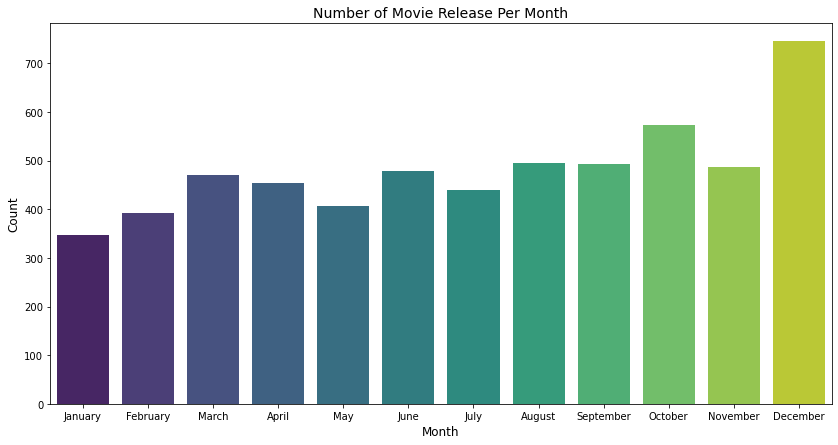

In [44]:
plt.figure(figsize=(14,7))
ax4 = sns.countplot(x=movies_budget['month'], palette='viridis',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Movie Release Per Month', fontsize=14);

In [ ]:
monthlyprofit = movies_budget.groupby('month', as_index=False)[['profit', 'profit_margin']].median().sort_values(by='profit', ascending=False)
monthlyprofit

In [4]:
#In order to work with the following columns, I needed to convert them to integers. First I removed the $.
tn_mb.domestic_gross = [x.strip('$') for x in tn_mb.domestic_gross]

In [5]:
tn_mb.production_budget = [x.strip('$') for x in tn_mb.production_budget]
tn_mb.worldwide_gross = [x.strip('$') for x in tn_mb.worldwide_gross]

In [6]:
tn_mb.production_budget = tn_mb['production_budget'].astype(str).str.replace(',', '').astype(int) 
tn_mb.domestic_gross = tn_mb['domestic_gross'].astype(str).str.replace(',', '').astype(int) 
tn_mb.worldwide_gross = tn_mb['worldwide_gross'].astype(str).str.replace(',', '').astype(np.int64) #This column threw an error so couldn't 
#reconvert to a string

In [7]:
tn_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [ ]:
#Quick review of non profitable films (we are focusing on domestic profits)
non_profitable = tn_mb[tn_mb['domestic_gross'] == 0]
print(len(non_profitable))
non_profitable

In [8]:
#Since we are focusing on how much the movies made, I will remove the non-profitable ones:
profitable_movies = tn_mb[tn_mb['domestic_gross'] !=0]
profitable_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [ ]:
#Deciding if whether or not I should drop the below review score column.
total_reviews = len(rt_cr['review_score'])
total_null = rt_cr['review_score'].isna().sum()
answer = len(rt_cr['review_score']) - rt_cr['review_score'].isna().sum()
print(f'{total_reviews} - {total_null} = {answer}')

In [ ]:
fresh_reviews = rt_cr[rt_cr['review_type'] == 'Fresh']
fresh_reviews.head(10)

In [ ]:
good_reviews = rt_cr[rt_cr['review_content'].str.contains('top-notch|rousing|good|great|excellent')]
good_reviews.head(10)

In [ ]:
rt_cr['review_content'][7]

In [ ]:
rt_cr['review_content'] = rt_cr['review_content'].astype('str')

In [ ]:
rt_cr['review_content']

In [ ]:
rt_cr = pd.read_csv('./data/rotten_tomatoes_critic_reviews.csv.gz')
rt_cr.head(10)

In [ ]:
rt_mv = pd.read_csv('./data/rotten_tomatoes_movies.csv.gz')
rt_mv.head(10)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
imdb_basics['genres']= imdb_basics['genres'].astype(str)

In [ ]:
genre_count = imdb_basics['genres'].str.split(',').explode().value_counts()

In [ ]:
movie_genres.reset_index()

In [ ]:
movie_genres.reset_index(inplace=True)
movie_genres = movie_genres.rename(columns = {'index':'Genre'})

In [ ]:
movie_genres.rename(columns = {'index':'Genre', 'genres':'Movie Count'}, inplace=True)

In [ ]:
movie_genres

In [ ]:
movie_genres = pd.DataFrame(genre_count)
movie_genres

In [ ]:
movie_genres = movie_genres.dropna()
movie_genres

In [ ]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=movie_genres['Movie Count'], y=movie_genres['Genre'], palette='viridis')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14);

In [ ]:
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)

In [10]:
imdb_basics = pd.read_csv('./data/imdb.title.basics.csv.gz')
imdb_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [18]:
movie_info = imdb_basics
movie_info.drop(columns=['original_title'], inplace=True)

In [20]:
movie_info = movie_info.rename(columns = {'primary_title':'movie'})
movie_info

,tconst,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [26]:
gross_genres = pd.merge(imdb_basics, profitable_movies, left_on=None, right_on=None)
gross_genres

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [27]:
genres_budgets = pd.merge(imdb_basics, profitable_movies, right_index = True, left_index = True)
genres_budgets

,tconst,primary_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...,...,...,...,...,...
5775,tt1183489,Stag Night of the Dead,2010,81.0,"Action,Comedy,Horror",76,"May 26, 2006",Cavite,7000,70071,71644
5776,tt1183911,Mr. Nice,2010,121.0,"Biography,Comedy,Crime",77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,tt1183919,Marley,2012,144.0,"Biography,Documentary,Music",79,"Apr 2, 1999",Following,6000,48482,240495
5779,tt1183923,Welcome to the Rileys,2010,110.0,Drama,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [29]:
genres_budgets.query('primary_title=="Avatar"')

,tconst,primary_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [30]:
filmss = pd.read_csv('./data/imdb.title.basics.csv.gz')
filmss

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [31]:
filmss.query('original_title=="Avatar"')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***